# Assignment 1
### Objectives: 
This assignment is to familiarise you with basic image processing methods. It also 
introduces you to common image processing and analysis tasks using OpenCV.

### Learning Outcomes: 
After completing this assignment, you will have learned how to:
1. Open and read image files.
2. Display and write image files.
3. Perform mathematical operations on images.
4. Apply basic image filtering operations.
The assignment files should be submitted online. 
Instructions for submission will be posted closer to the deadline.
Deadline for submission is Week 4, Thursday 6 October 2022, 13:00:00.
5. Perform image adjustment and restoration. 

### Goal:
This assignment is to write image processing code that can open a digital image, 
perform a sequence of pixel manipulation operations (step-by-step as listed under Tasks
below), in order to remove background shading.

#### See details in the Assignment Specification.

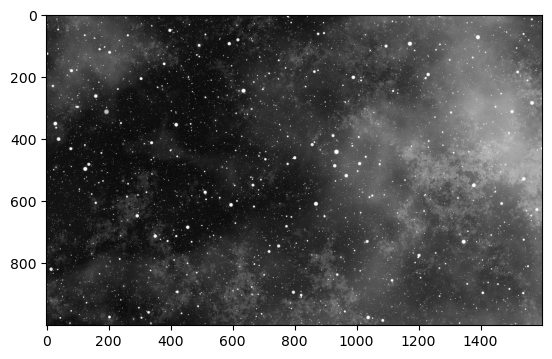

In [1]:
import numpy as np
import cv2
import math
import sys
import matplotlib.pyplot as plt

I_path = "Stars.png"
imgI = cv2.imread(I_path,0)
plt.imshow(imgI,cmap ='gray')

### Task 1: Background Estimation

In [2]:
class get_kernel_position:
    def __init__(self, head_position, center_position, tail_position):
        sefl.head_position = head_position
        sefl.center_position = center_position
        sefl.tail_position = tail_position

In [3]:
def create_same_image(image, flag):
    """This function returns an image_A whose rows, colunms are same as the imput image (image_I)
    image -- the input image
    flag -- 'dark' or 'bright' (fill the new array with 0 or 255)
    """
    image_rows, image_cols = image.shape # get the scale of imgI
#     image_A = np.zeros((image_rows, image_cols), image.dtype)
    if flag == 'dark':
        image_A = np.zeros((image_rows, image_cols), image.dtype)
    elif flag == 'bright':
        image_A = np.full((image_rows, image_cols), 255, image.dtype)
    return image_A
                

In [4]:
def get_kernel_info(head_index, n):
    """This function returns the information of the kernel, including the indexes of center, head and tail position. 
       head_index -- the index of the present head position
       n -- the size of kernel, n*n.
    """
    head_x = head_index[0]
    head_y = head_index[1]
    kernel_center = int(n/2)
    center_x = head_x + kernel_center
    center_y = head_y + kernel_center
    center_index = (center_x, center_y)
    tail_x = center_x + kernel_center
    tail_y = center_y + kernel_center
    tail_index = (tail_x, tail_y)
    kernel_position = get_kernel_position(head_index,center_index,tail_index)
    return kernel_position

In [5]:
def min_filtering(image, n, color):
    """This function returns the min-filtered image of input image
       image -- the input image
       n -- n*n size kernel. Note that n should be an odd value
    """
    image_min_filtered = create_same_image(image,color) # create a new image
    rows, cols = image.shape
    kernel_center = int(n/2)
    row_max = rows - 2*kernel_center
    col_max = cols - 2*kernel_center
    for y in range (0,row_max): # range depends on the head
        for x in range (0,col_max):
            value_min = 255
            for y2 in range (y, y+n):
                for x2 in range (x, x+n):
                    value_tmp = image[y2][x2]
                    if value_tmp < value_min:
                        value_min = value_tmp
            image_min_filtered[y+kernel_center][x+kernel_center] = value_min
    return image_min_filtered


In [6]:
def max_filtering(image, n, color):
    """This function returns the max-filtered image of input image
       image -- the input image
       n -- n*n size kernel. Note that n should be an odd value
    """
    image_max_filtered = create_same_image(image,color) # create a new image
    rows, cols = image.shape
    kernel_center = int(n/2)
    row_max = rows - 2*kernel_center
    col_max = cols - 2*kernel_center
    for y in range (0,row_max): # range depends on the head
        for x in range (0,col_max):
            value_max = 0
            for y2 in range (y, y+n):
                for x2 in range (x, x+n):
                    value_tmp = image[y2][x2]
                    if value_tmp > value_max:
                        value_max = value_tmp
            image_max_filtered[y+kernel_center][x+kernel_center] = value_max
    return image_max_filtered

In [7]:
def start_filtering(image, n, flag, color):
    """This function is going to apply the filter and it will return a filtered image
    image -- the input image
    n -- n*n size kernel. Note that n should be an odd value
    flag -- a flag that can chose to apply min_filter or max_filter
    color -- 'dark' or 'bright'
    """
    if n % 2 == 1: # exam n is odd or not
        if flag == 'min':
            image_filtered = min_filtering(image,n,color)
        elif flag == 'max':
            image_filtered = max_filtering(image,n,color)
        return image_filtered
    else: # if n is not odd, print error information
        print("[error] The parameter n should be odd! Please enter an odd value!")
    

In [39]:
def background_subtraction(img_origin, img_background, n, flag, color):
    """This function returns a image whose background has been subtracted
    img_origin -- the original image
    img_background -- the background image
    n -- n*n size kernel. Note that n should be an odd value
    flag -- a flag that decides min_filtering first or max_filtering first
    color -- 'dark' or 'bright'
    """
    image_subtracted = create_same_image(img_origin,color) # create a new image
    rows, cols = img_origin.shape
    kernel_center = int(n/2)
    row_max = rows - kernel_center
    col_max = cols - kernel_center
    if flag == 0:        
        for y in range (kernel_center,row_max): # range start from the center of the first kernel when filtering
            for x in range (kernel_center,col_max):
                image_subtracted[y][x] = img_origin[y][x] - img_background[y][x]
                
    elif flag == 1:
        for y in range (kernel_center,row_max): # range depends on the head
            for x in range (kernel_center,col_max):
                image_subtracted[y][x] = int(img_origin[y][x]) - int(img_background[y][x]) + 255
    return image_subtracted

In [34]:
def start_background_subtraction(image, n, flag, color):
    """This function is going to implement the whole processes of the backgroun subtraction. 
    It will return a image whose background has been subtracted.
    image -- the input image
    n -- n*n size kernel. Note that n should be an odd value
    M -- a flag that can chose to apply min_filter or max_filter
    color -- 'dark' or 'bright'
    """
    if flag == 0:
        image_minfiltered = start_filtering(image,n,'min',color)
        image_background = start_filtering(image_minfiltered,n,'max',color)
        image_result = background_subtraction(image,image_background,n,flag,color)
        return image_result
    elif flag == 1:
        image_maxfiltered = start_filtering(image,n,'max',color)
        image_background = start_filtering(image_maxfiltered,n,'min',color)
        image_result = background_subtraction(image,image_background,n,flag,color)
        return image_result

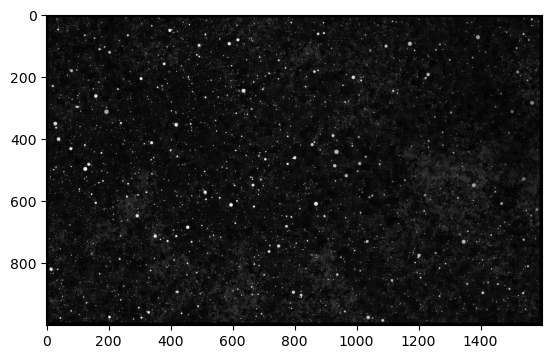

In [30]:
# Task 1 and Task2 results
# T1_1
# use the create_same_image() function
imgA = create_same_image(imgI,'dark')
# plt.imshow(imgA, cmap='gray')
# cv2.imwrite("imgAAA.png",imgA)
# print(imgA)
M = 0
n = 17
imgO = start_background_subtraction(imgI, n, M, 'dark')
plt.imshow(imgO,cmap='gray')

In [32]:
# output imgO
cv2.imwrite("imageO.png",imgO)

True

### Following are details of Task 1 and Task2

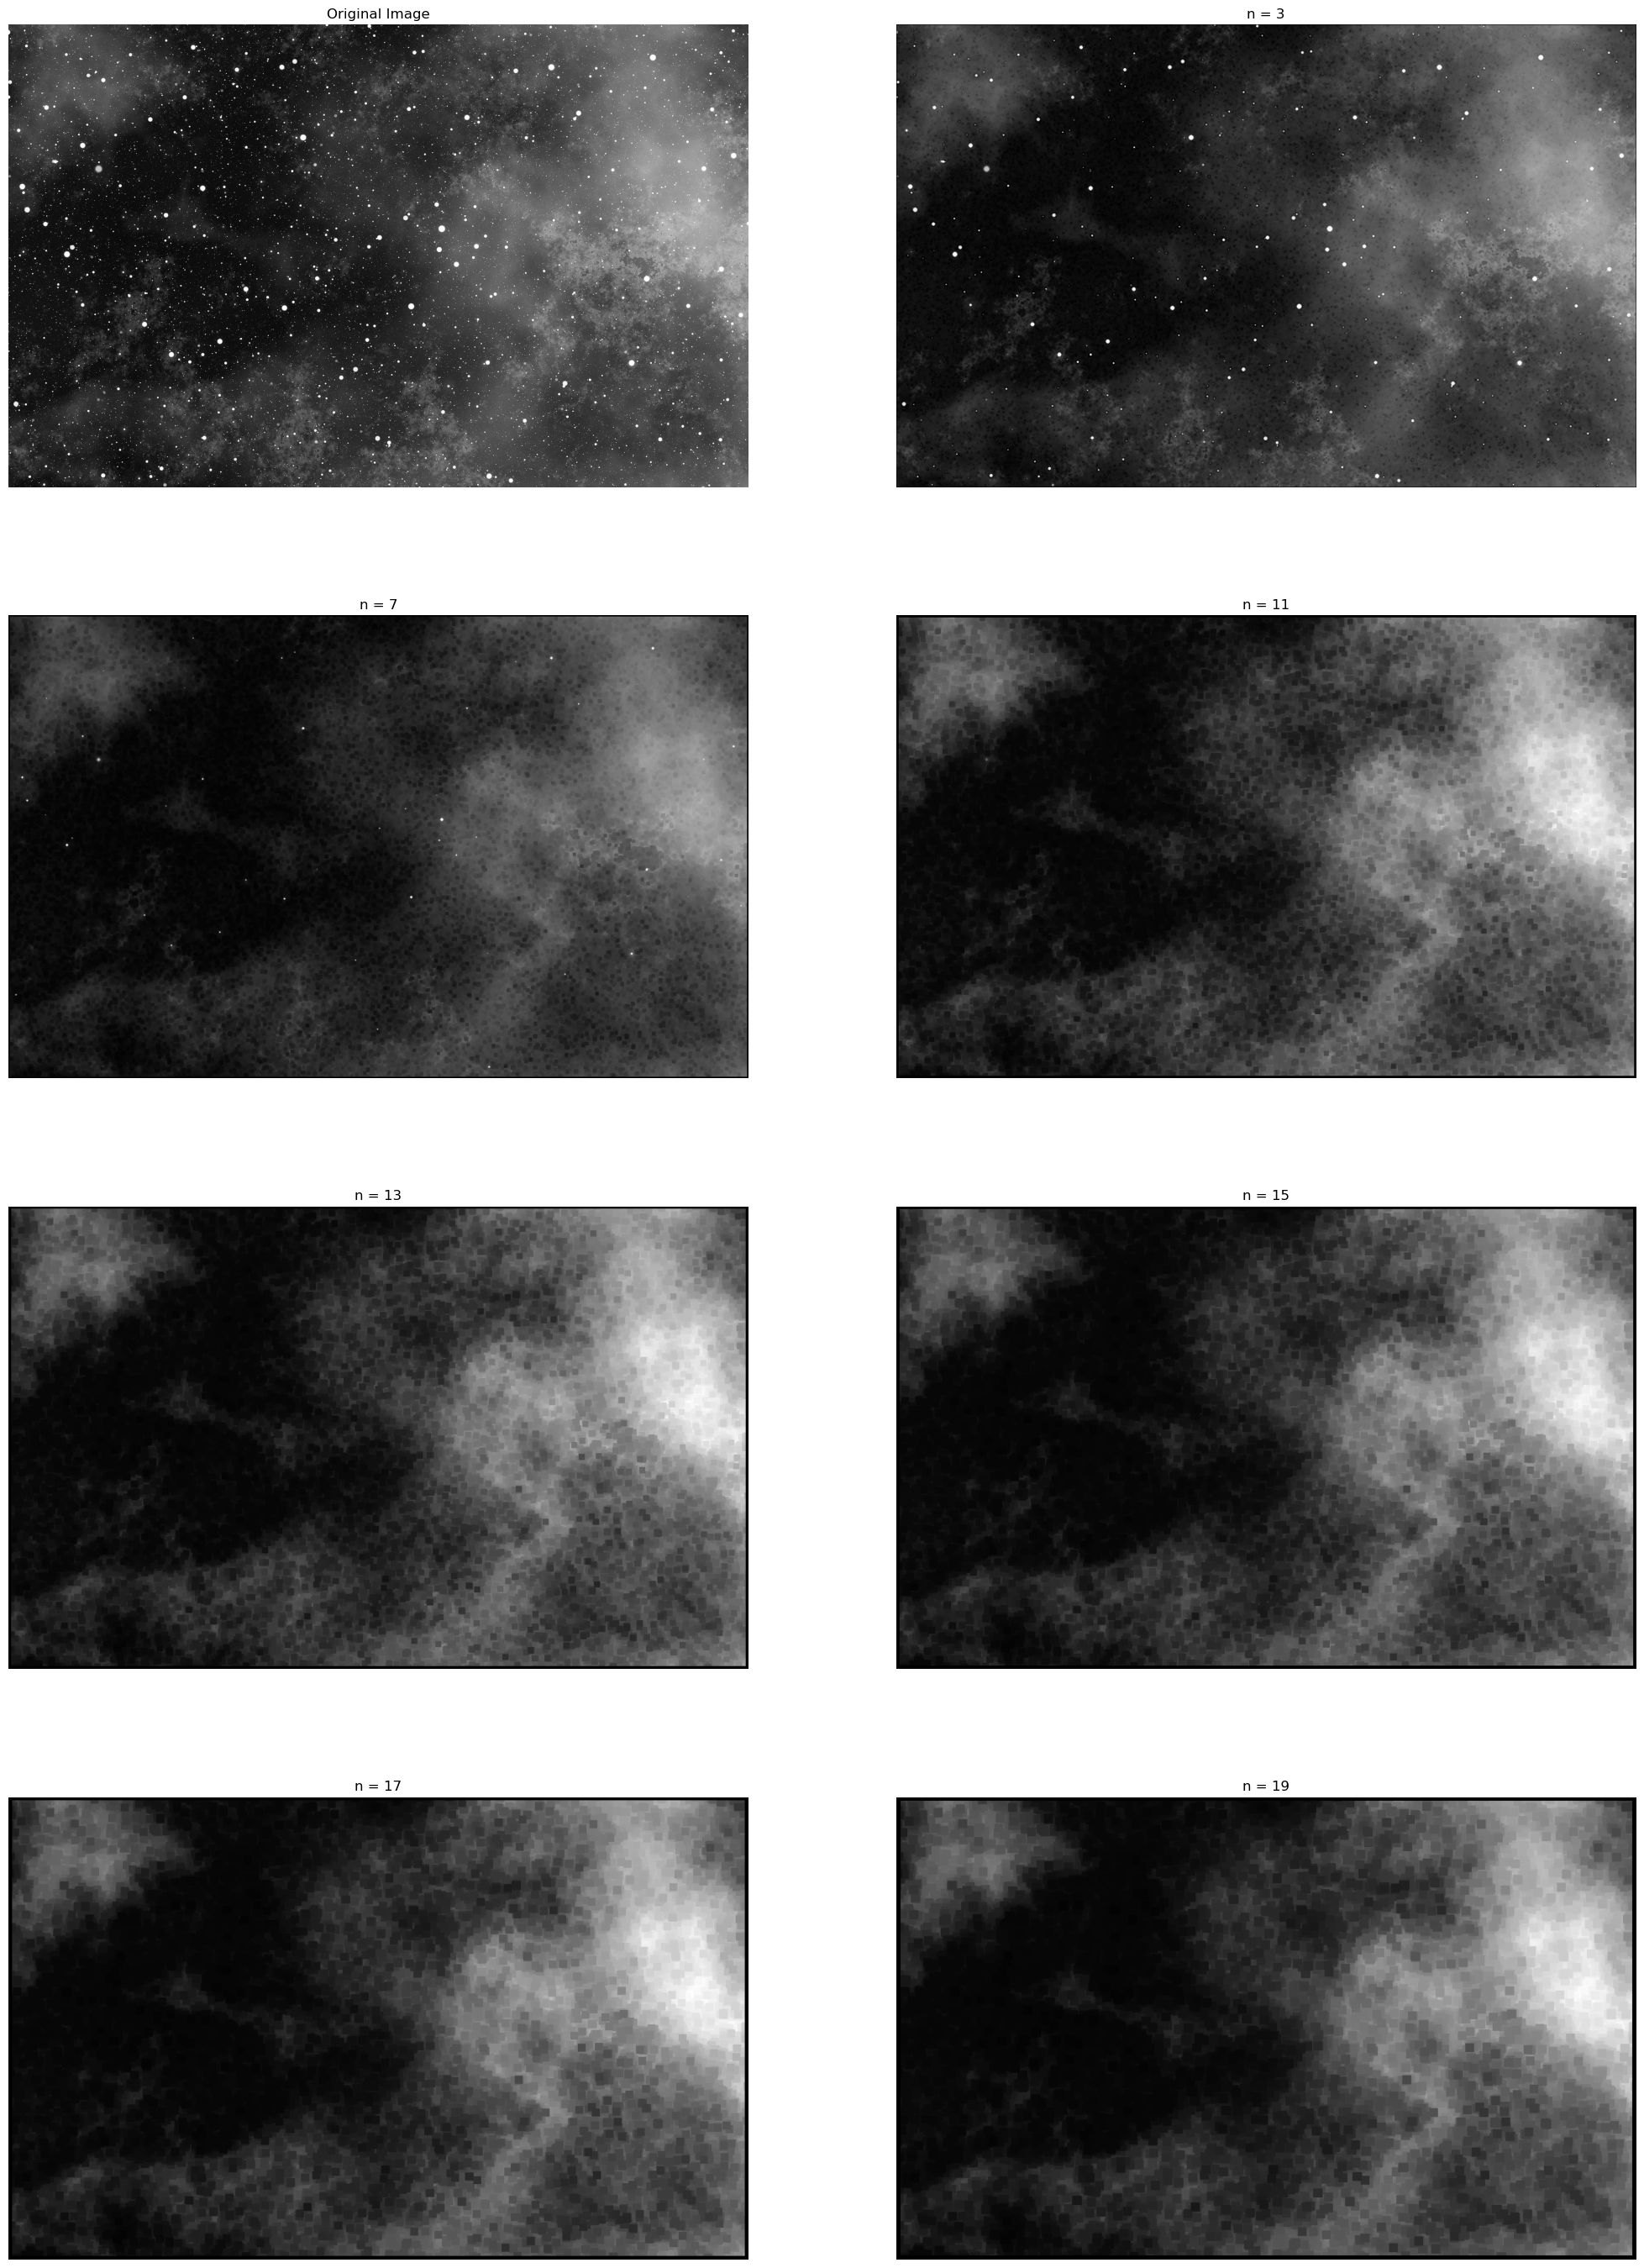

In [43]:
# use the min_filtering() function
# create a blank figure
fig = plt.figure(figsize = (25,35))
# plot the original image
fig.add_subplot(4,2,1)
plt.axis('off')
plt.imshow(imgI,cmap ='gray')
plt.title("Original Image")
img_list = []
# plot min_filtered images with different odd n values
n_list = [3,7,11,13,15,17,19]
flag = 'min'
m = 2
for n in n_list:
#     imgA = min_filtering(imgI, n)
    imgA = start_filtering(imgI,n,flag,'dark')
    img_list.append(imgA)
    fig.add_subplot(4,2,m)
    plt.axis('off')
    plt.imshow(imgA, cmap ='gray')
    plt.title("n = {a}".format(a = n))
    m = m + 1
# save the figure
plt.savefig('T12_comparison.png', bbox_inches ='tight')


From above images, we are easily to see that n=17 is the smallest value of n that causes the stars in image I to visually disappear altogether in image A. As it is known to all that in gray scale, 0 represents dark, and 255 represents bright. And the min_filter is going to assign the minimum value in the kernel range to the center. So when appling the min_filter, if we chose the larger value of n, we are more likely to get a image that stars(extreme bright pisxels) disappear altogether. When the chosing the values of n which are larger than 17, the number of dark pixels will increase, and these "outstanding" dark pixels will become the noise which will affect the quality of the result image.

True

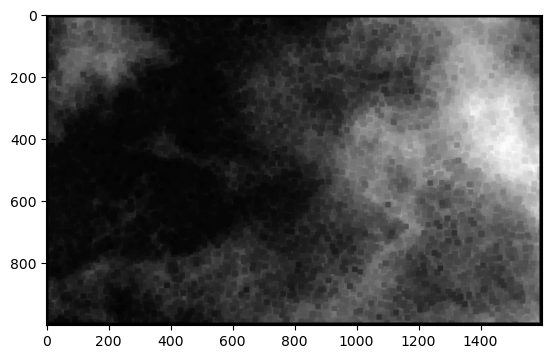

In [44]:
# imgA_n17 = min_filtering(imgI, 17)
# img_list[5] is the filtered image with n = 17
imgA = img_list[5]
plt.imshow(imgA, cmap ='gray')
cv2.imwrite("imageA.png", imgA)

In [45]:
# T1_3
# create image B whose size is same as image I and image A
imgB = create_same_image(imgI,'dark')
# plt.imshow(imgB, cmap='gray')

True

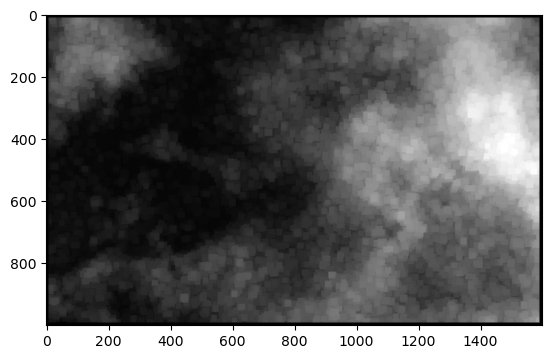

In [46]:
# T1_4
#use appling max_filter
n = 17
flag = 'max'
imgB = start_filtering(imgA,n,flag,'dark')
# imgB_n17 = max_filtering(imgA, 17)
plt.imshow(imgB, cmap ='gray')
cv2.imwrite("imageB.png", imgB)

### Task 3: Algorithm Extensions

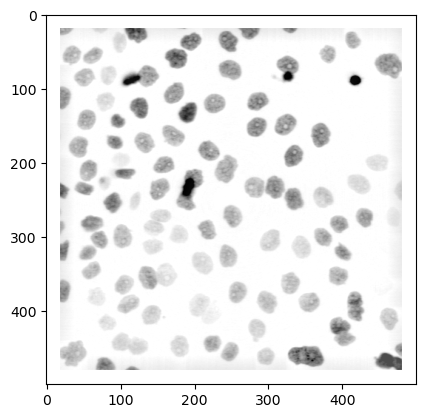

In [54]:
# Task 3
# read the 'Nuclei.png' image
X_path = "Nuclei.png"
imgX = cv2.imread(X_path, 0)
# plt.imshow(imgX, cmap = 'gray')

M = 1
n = 39
imgX_sub = start_background_subtraction(imgX, n, M, 'bright')
plt.imshow(imgX_sub,cmap='gray')

In [42]:
# output the imgX_sub
cv2.imwrite("imageX_sub.png",imgX_sub)

True

### Following is the comparison of Task 3

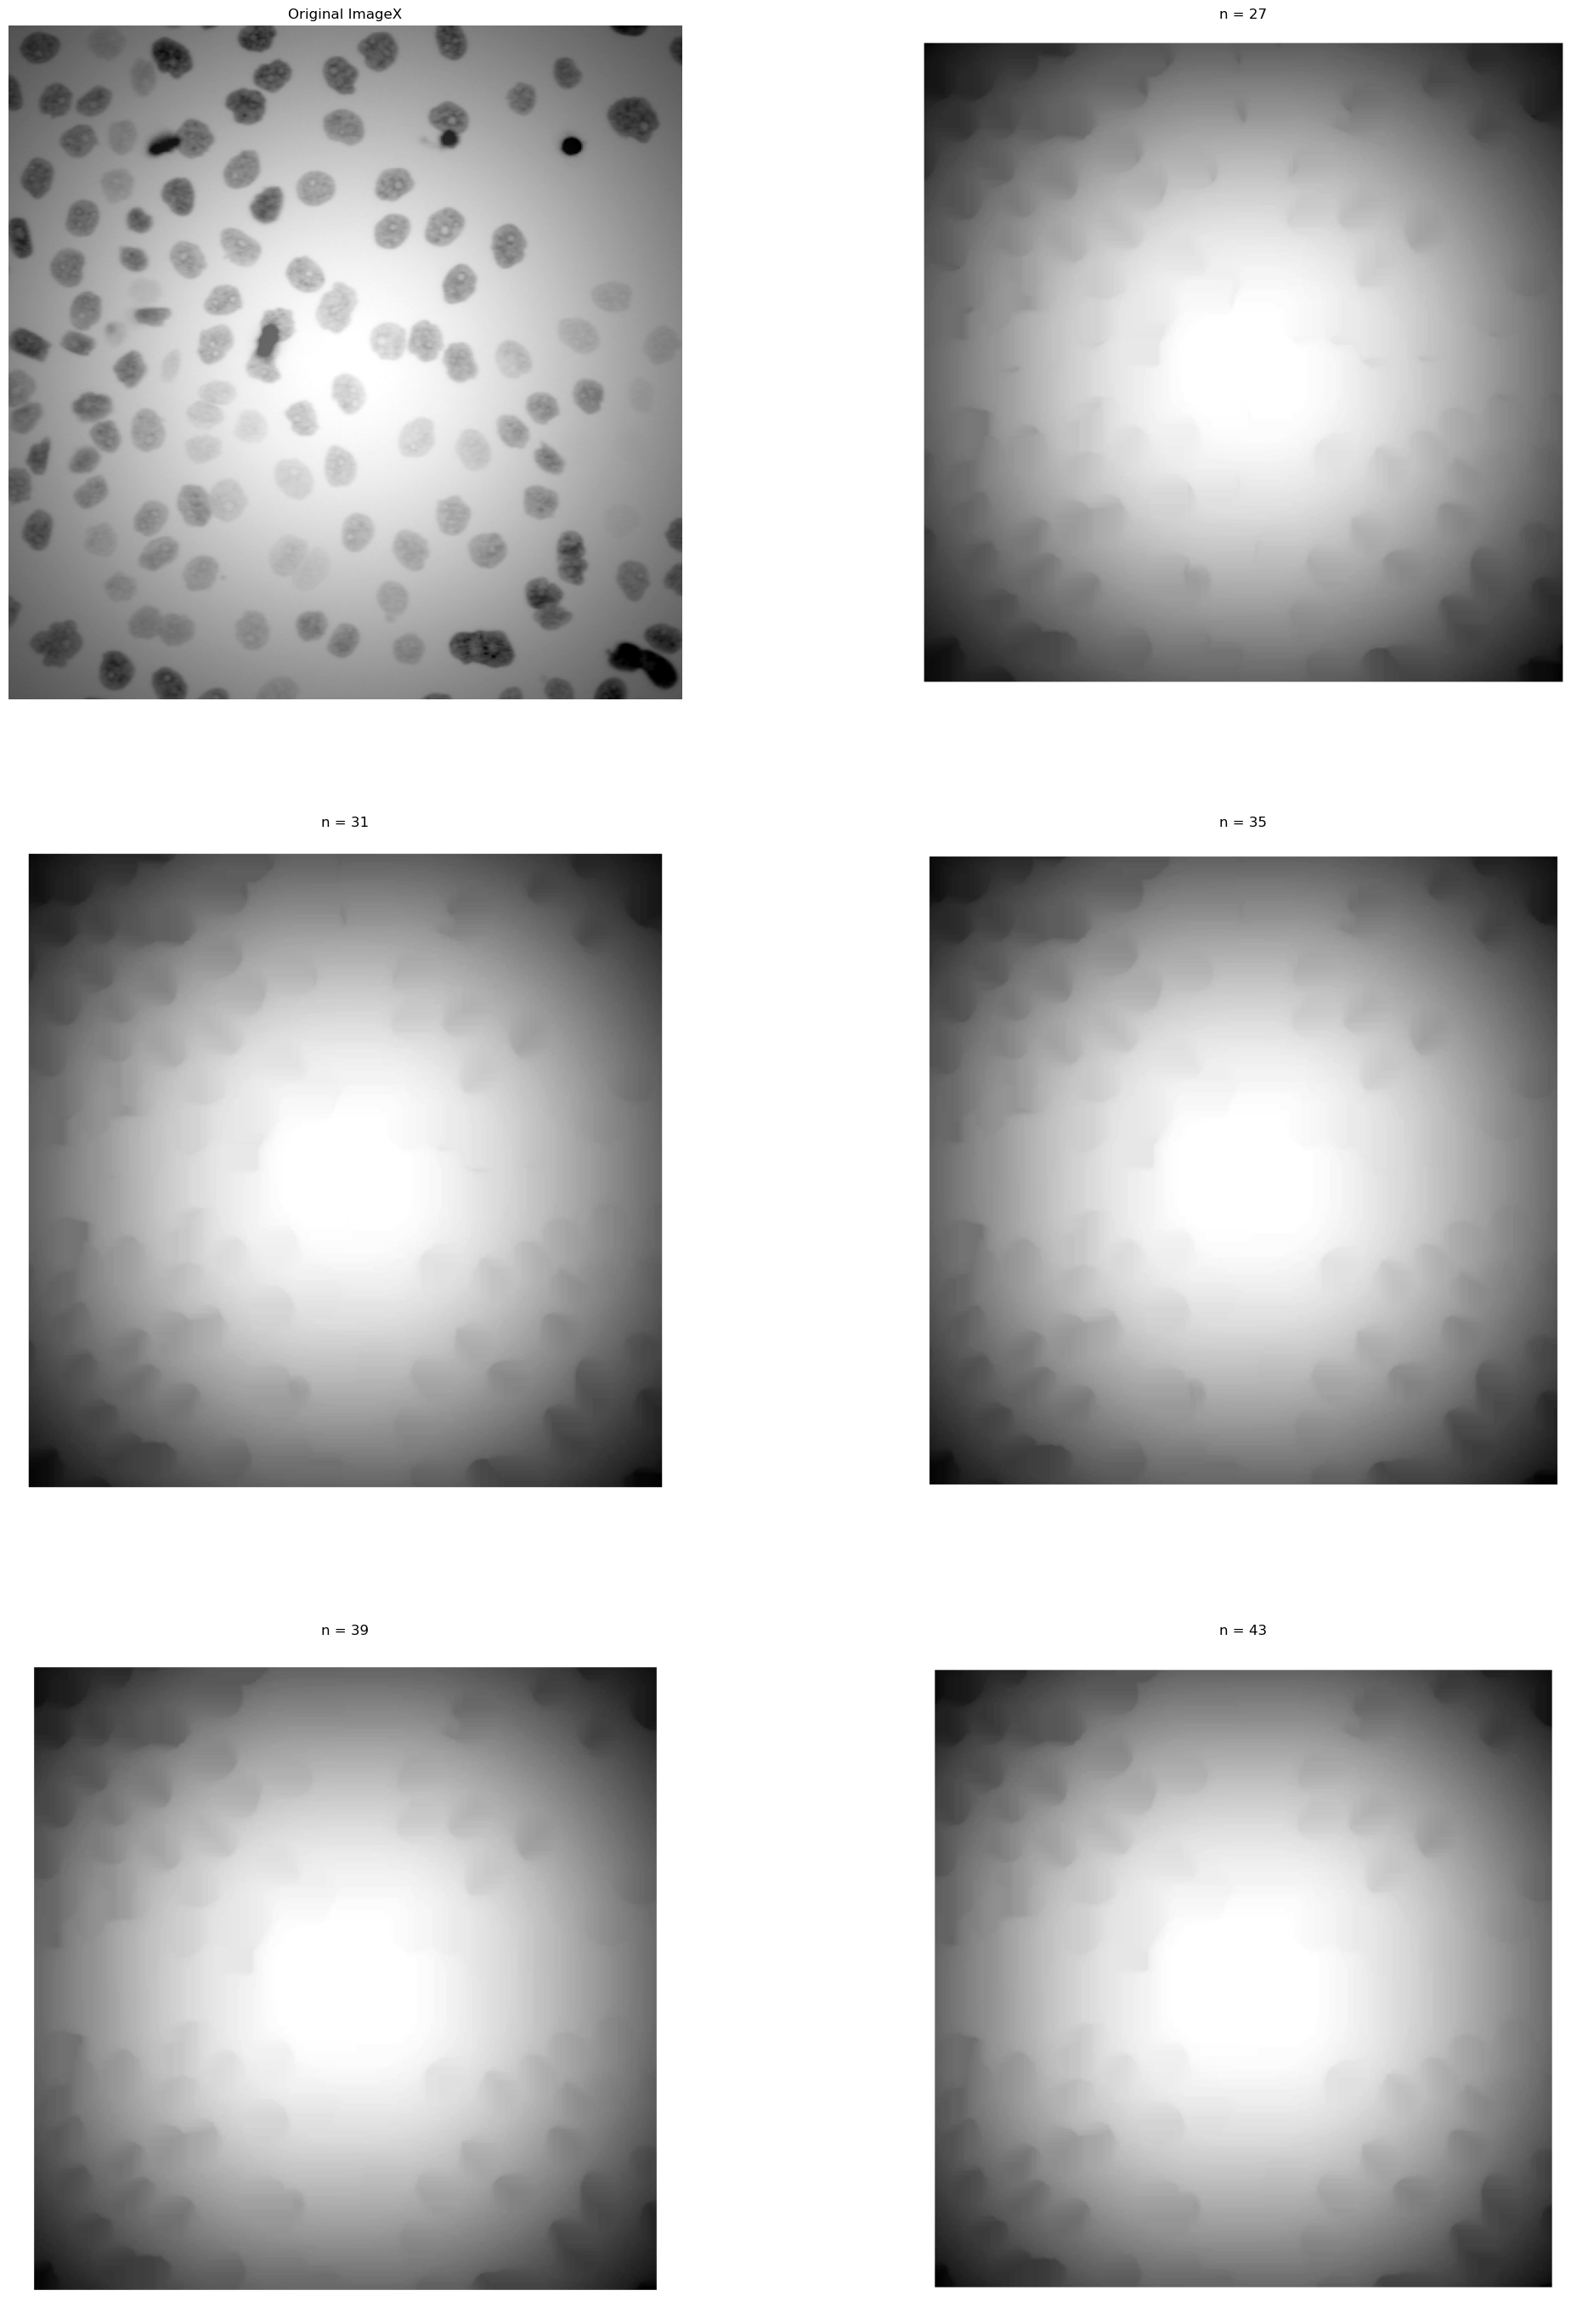

In [49]:
# create a blank figure
fig = plt.figure(figsize = (25,35))
# plot the original image
fig.add_subplot(3,2,1)
plt.axis('off')
plt.imshow(imgX,cmap ='gray')
plt.title("Original ImageX")
flag = 'max'
n_list = [27, 31, 35, 39, 43]
imgX_list = []
m = 2
for n in n_list:
    imgX_maxfiltered = start_filtering(imgX,n,flag,'bright')
    imgX_list.append(imgX_maxfiltered)
    fig.add_subplot(3,2,m)
    plt.axis('off')
    plt.imshow(imgX_maxfiltered, cmap ='gray')
    plt.title("n = {a}".format(a = n))
    m = m + 1
# save the figure
plt.savefig('T3_comparison.png', bbox_inches ='tight')

True

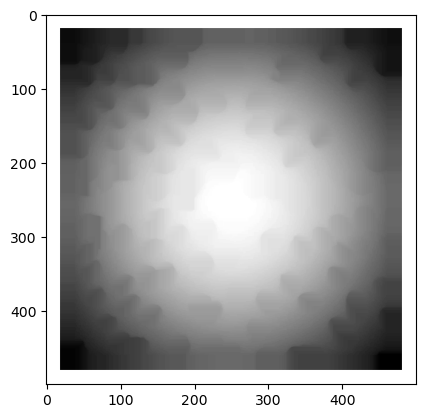

In [50]:
flag = 'min'
n = 39
imgX_background = start_filtering(imgX_list[3],n,flag,'bright')
plt.imshow(imgX_background, cmap = 'gray')
cv2.imwrite("imgX_background.png", imgX_background)

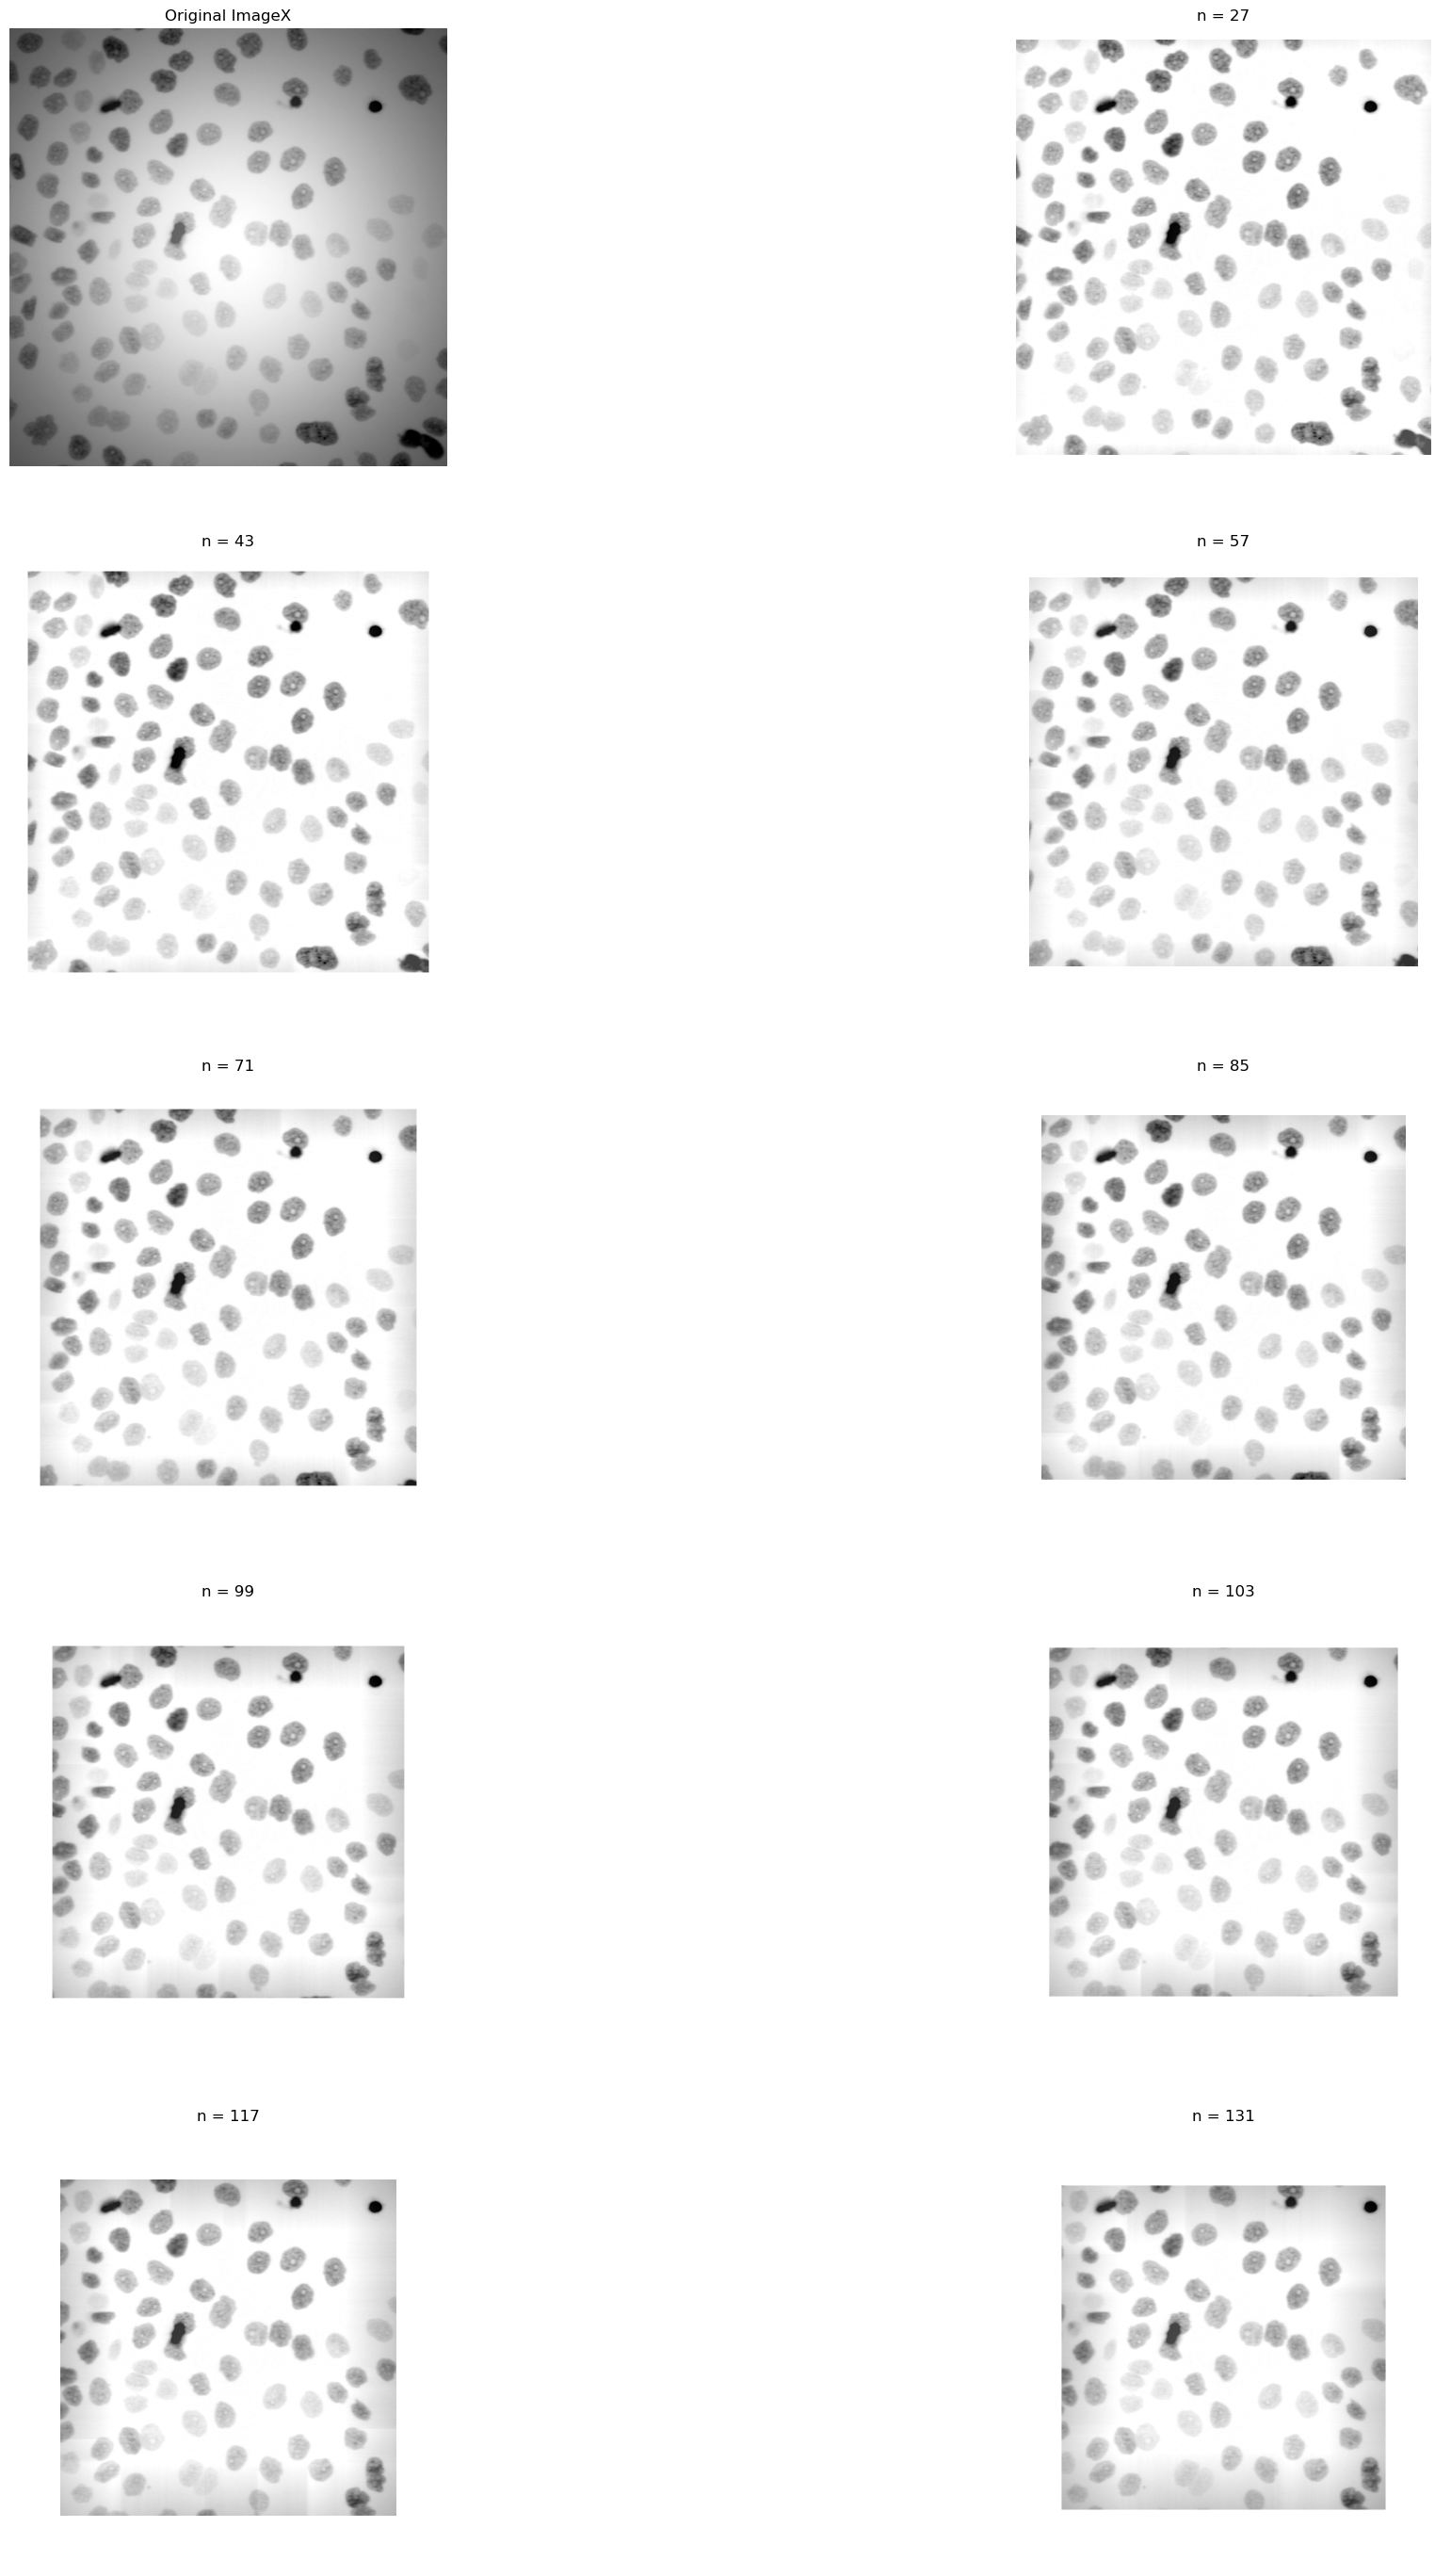

In [55]:
# create a blank figure
fig = plt.figure(figsize = (25,35))
# plot the original image
fig.add_subplot(5,2,1)
plt.axis('off')
plt.imshow(imgX,cmap ='gray')
plt.title("Original ImageX")
flag = 'max'
n_list = [27, 43, 57, 71, 85, 99, 103, 117, 131]
imgX_list = []
m = 2
for n in n_list:
    imgX_sub2 = start_background_subtraction(imgX, n, 1, 'bright')
    imgX_list.append(imgX_sub2)
    fig.add_subplot(5,2,m)
    plt.axis('off')
    plt.imshow(imgX_sub2, cmap ='gray')
    plt.title("n = {a}".format(a = n))
    m = m + 1
# save the figure
plt.savefig('T3_comparison2.png', bbox_inches ='tight')